In [1]:
#importing required packages

#modelues for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
# import scipy.stats as stats

#modules for model building
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

#setting plot style
plt.style.use('seaborn-darkgrid')

In [2]:
test = pd.read_csv("fraudTest.csv")
train = pd.read_csv("fraudTrain.csv")
# Combining the train and test datasets for data cleaning and data visulization
data = pd.concat([train, test], axis = 0)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
train.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1296675.000000,1296675,1296675.000000,1296675,1296675,1296675.000000,1296675,1296675,1296675,1296675,1296675,1296675,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675,1296675,1296675,1296675.000000,1296675.000000,1296675.000000,1296675.000000
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,894,51,NaN,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,NaN,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,5617,94876,NaN,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,648337.000000,NaN,417192042079726656.000000,NaN,NaN,70.351035,NaN,NaN,NaN,NaN,NaN,NaN,48800.671097,38.537622,-90.226335,88824.440563,NaN,NaN,NaN,1349243636.726123,38.537338,-90.226465,0.005789
std,374317.974488,NaN,1308806447000789248.000000,NaN,NaN,160.316039,NaN,NaN,NaN,NaN,NaN,NaN,26893.222476,5.075808,13.759077,301956.360689,NaN,NaN,NaN,12841278.423360,5.109788,13.771091,0.075863
min,0.000000,NaN,60416207185.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1257.000000,20.027100,-165.672300,23.000000,NaN,NaN,NaN,1325376018.000000,19.027785,-166.671242,0.000000
25%,324168.500000,NaN,180042946491150.000000,NaN,NaN,9.650000,NaN,NaN,NaN,NaN,NaN,NaN,26237.000000,34.620500,-96.798000,743.000000,NaN,NaN,NaN,1338750742.500000,34.733572,-96.897276,0.000000
50%,648337.000000,NaN,3521417320836166.000000,NaN,NaN,47.520000,NaN,NaN,NaN,NaN,NaN,NaN,48174.000000,39.354300,-87.476900,2456.000000,NaN,NaN,NaN,1349249747.000000,39.365680,-87.438392,0.000000
75%,972505.500000,NaN,4642255475285942.000000,NaN,NaN,83.140000,NaN,NaN,NaN,NaN,NaN,NaN,72042.000000,41.940400,-80.158000,20328.000000,NaN,NaN,NaN,1359385375.500000,41.957164,-80.236796,0.000000


In [5]:
train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [6]:
# Resetting the index
train.reset_index(inplace = True)
train.head(10)

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.630000,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.375000,-75.204500,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.540000,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.993100,-100.989300,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.650000,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.843200,-78.600300,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.270000,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.335900,-79.660700,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.390000,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.522000,-87.349000,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [7]:
# Checking for duplicate values
train.duplicated().sum()

0

In [8]:
train = train.drop(['index', 'Unnamed: 0'], axis = 1)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Creating usable features from the Date column

In [9]:
type(train["trans_date_trans_time"])

pandas.core.series.Series

In [10]:
#converting trans_date_trans_time into datetime
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
print(train.dtypes['trans_date_trans_time'])
train.head()

datetime64[ns]


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
# deriving additonal columns from 'trans_date_trans_time'
#deriving hour
train['trans_hour'] = train['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
train['trans_day_of_week'] = train['trans_date_trans_time'].dt.day_name()
#deriving 'year_month'
train['trans_year_month'] = train['trans_date_trans_time'].dt.to_period('M')

train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


In [12]:
#finding age
#converting 'dob' column to datetime
train['dob'] = pd.to_datetime(train['dob'])
train['age'] = np.round((train['trans_date_trans_time'] - 
                      train['dob'])/np.timedelta64(1, 'Y'))
train.age.head()

0   31.000000
1   41.000000
2   57.000000
3   52.000000
4   33.000000
Name: age, dtype: float64

In [13]:
#let us first bin the age feature
for i in range(len(train.age)):
  if train.age[i] <= 30:
    train.age[i] = '< 30'
  elif train.age[i] > 30 and train.age[i] <= 45:
    train.age[i] = '30-45'
  elif train.age[i] > 45 and train.age[i] <= 60:
    train.age[i] = '46-60'
  elif train.age[i] > 60 and train.age[i] <= 75:
    train.age[i] = '61-75'
  else:
    train.age[i] = '> 75'

train.age.head()

0    30-45
1    30-45
2    46-60
3    46-60
4    30-45
Name: age, dtype: object

In [14]:
#dropping unnecessary columns 
train.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
train.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,30-45
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,30-45
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,46-60
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,46-60
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,30-45


<Axes: xlabel='is_fraud', ylabel='count'>

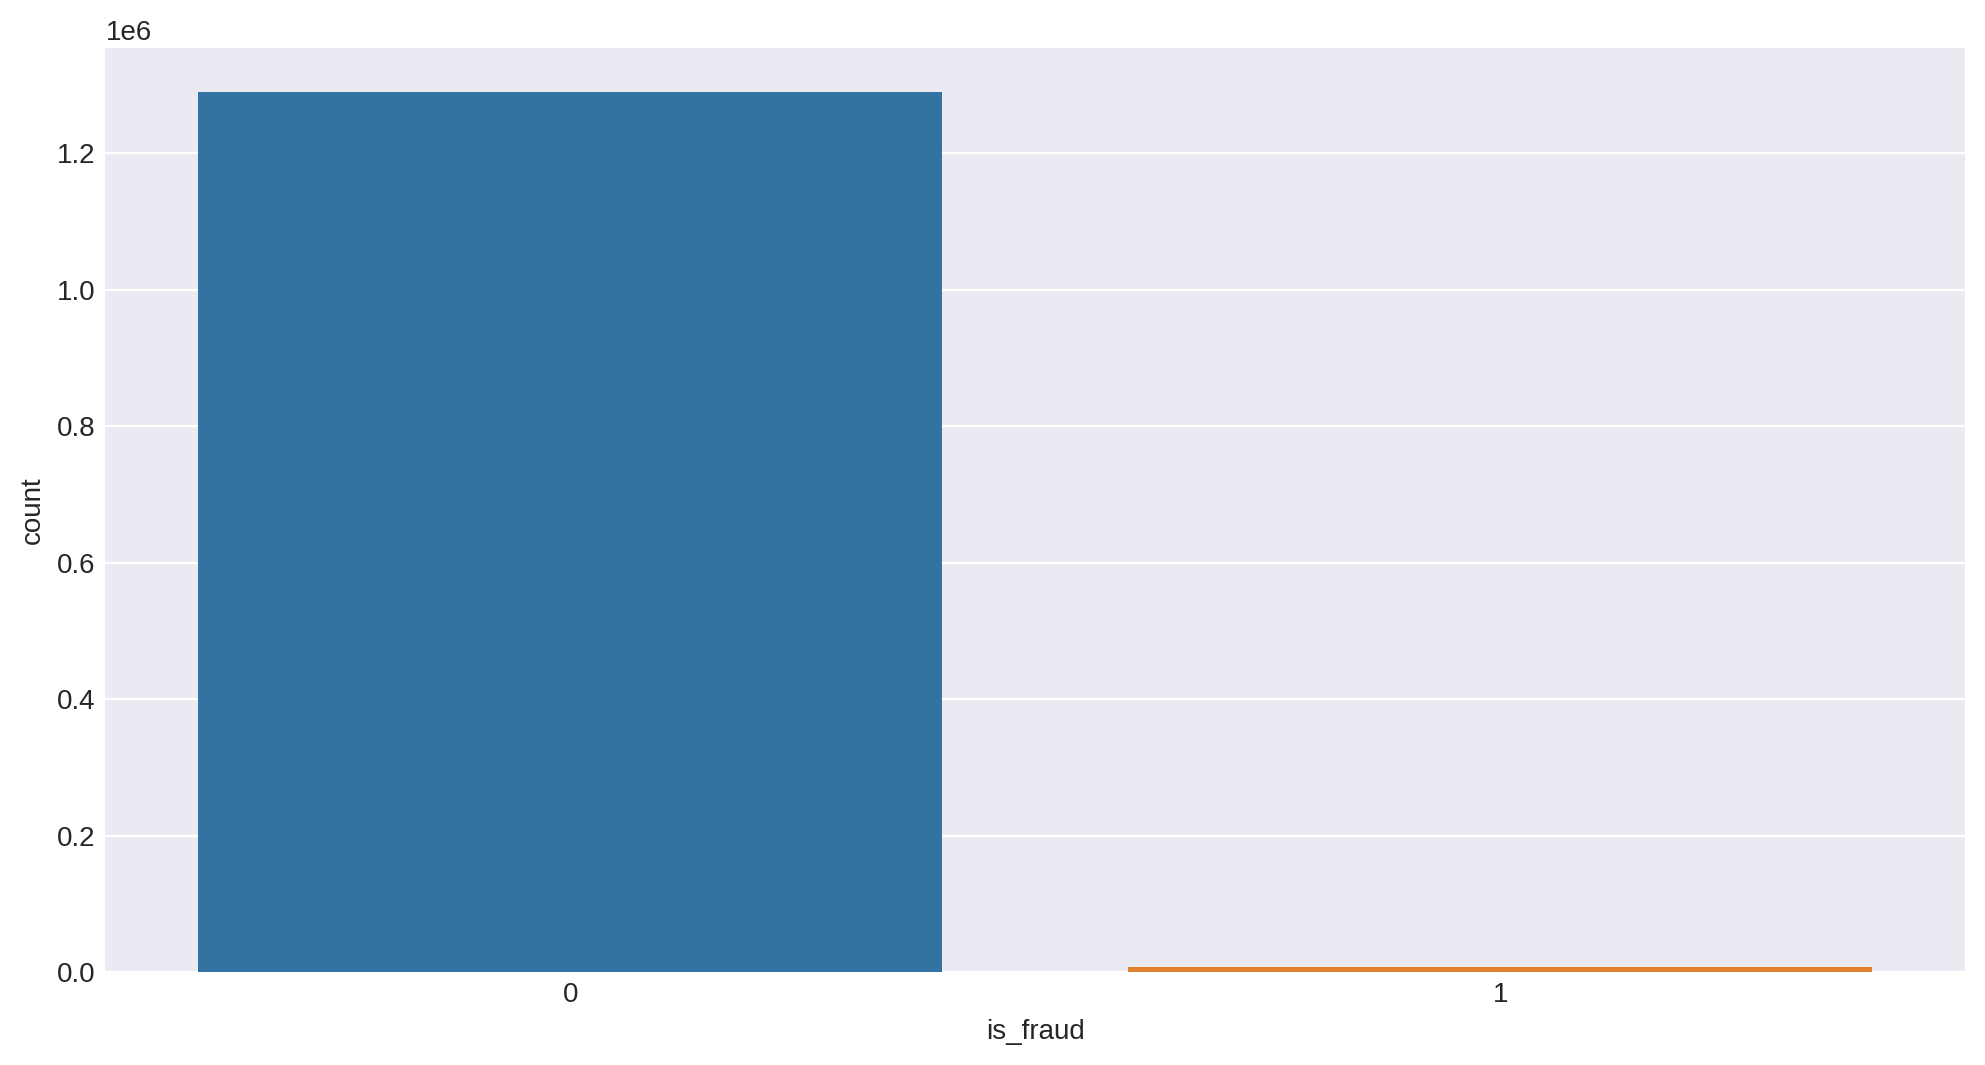

In [15]:
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = train['is_fraud'])

<Axes: xlabel='gender', ylabel='count'>

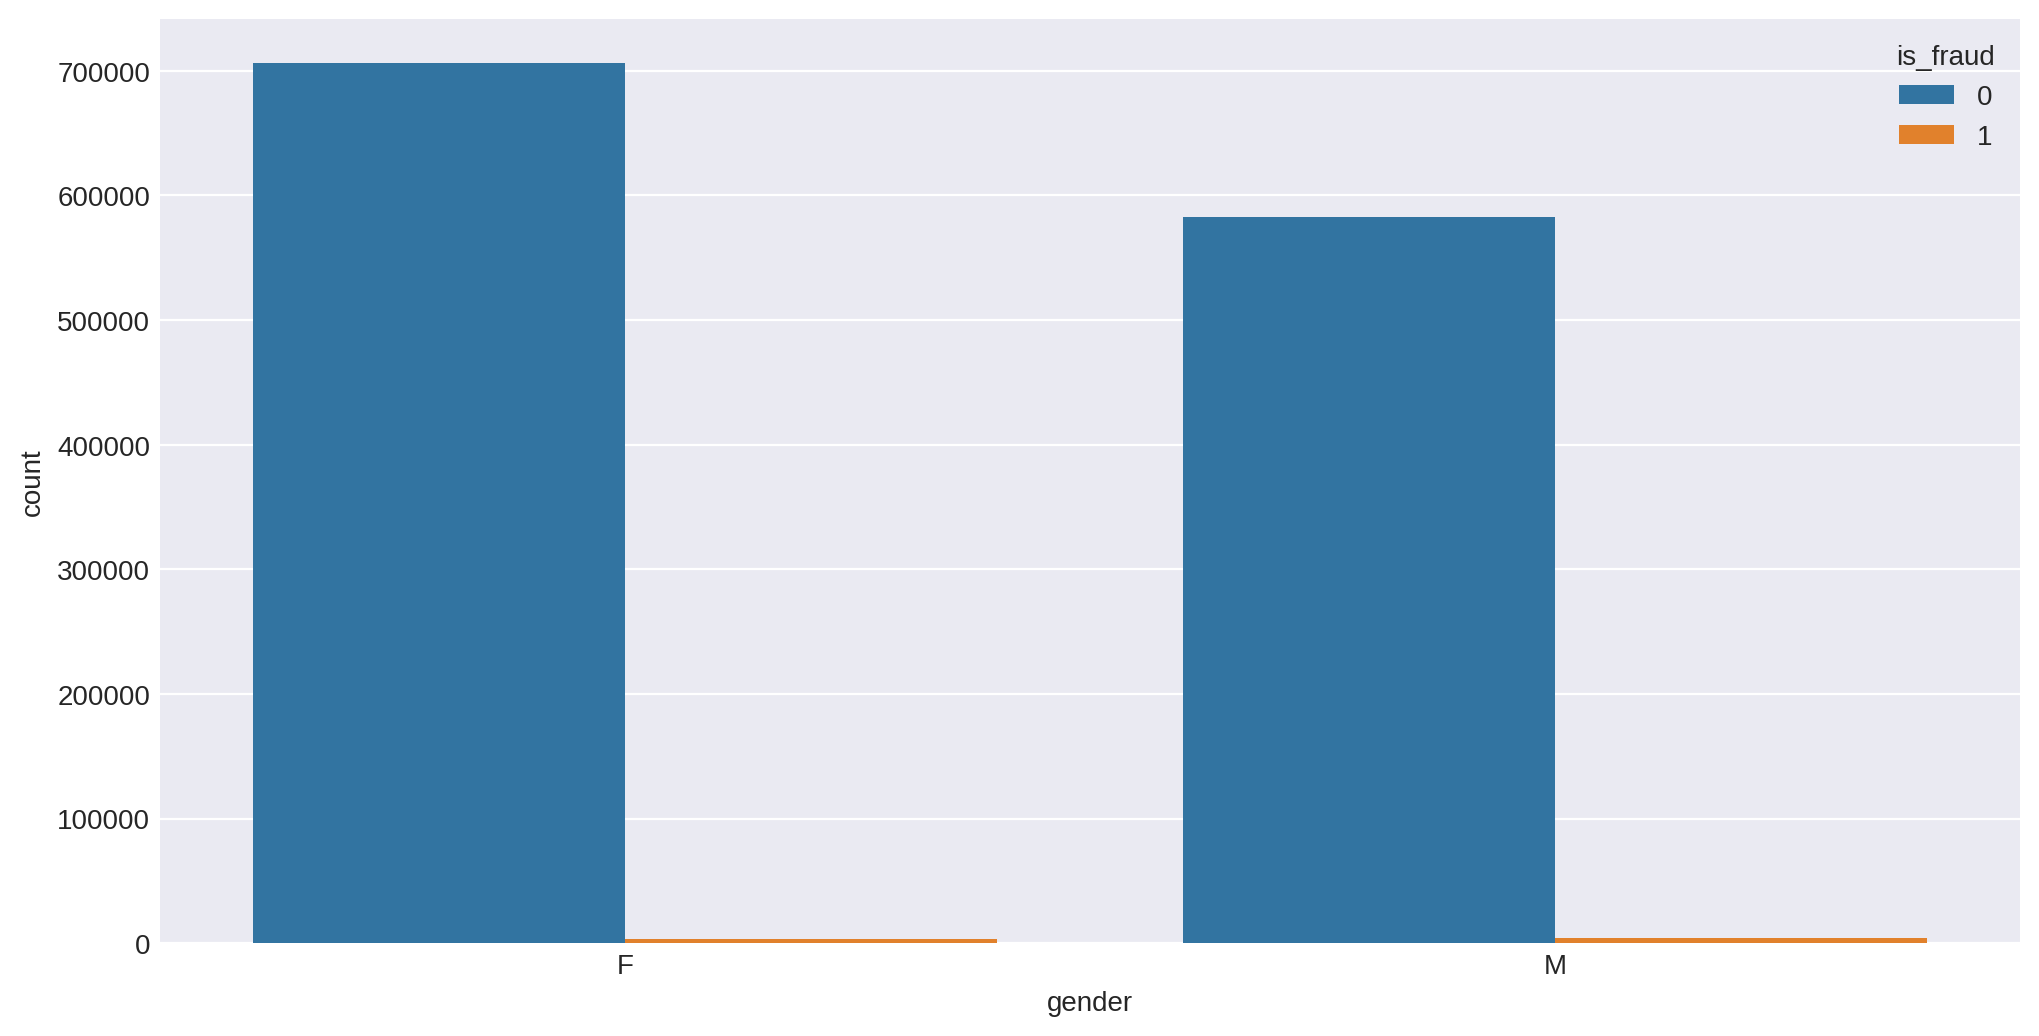

In [16]:
# Fraud wrt Gender
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = 'gender', hue = 'is_fraud', data = train)

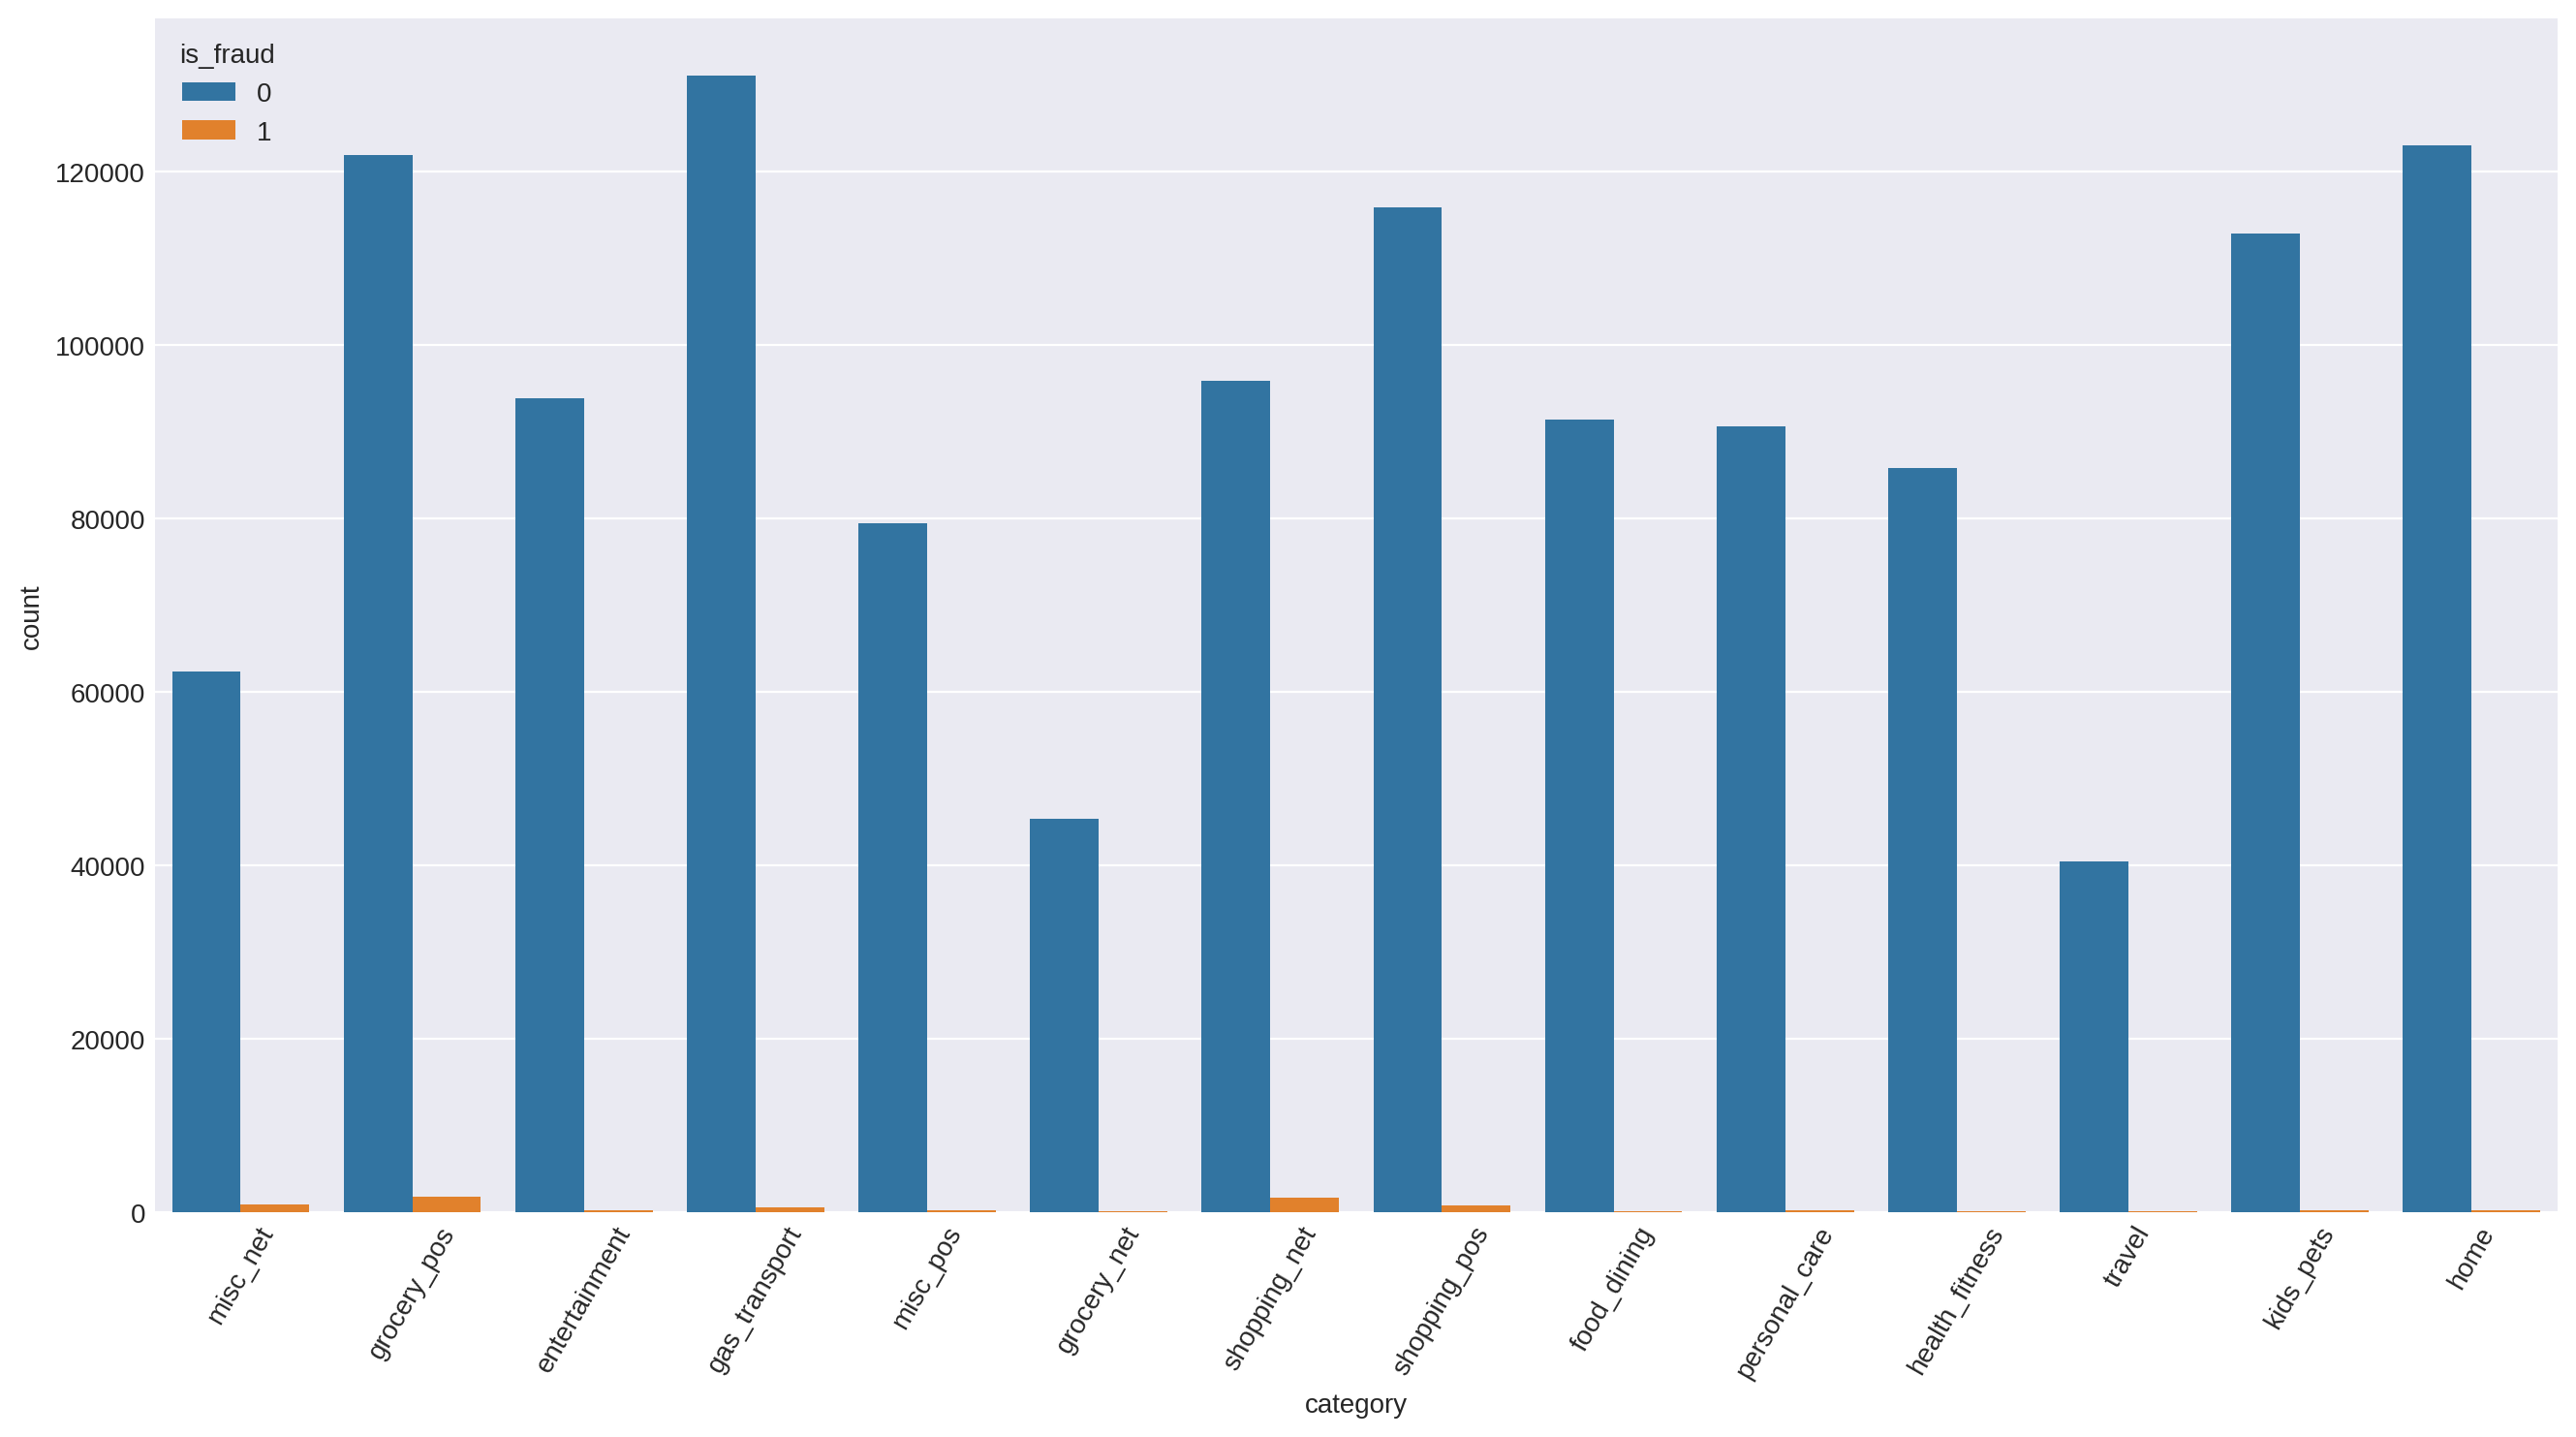

In [17]:
plt.figure(figsize = (16, 8), dpi = 200)
sns.countplot(x = 'category', hue = 'is_fraud', data = train)
plt.xticks(rotation = 60)
plt.show()

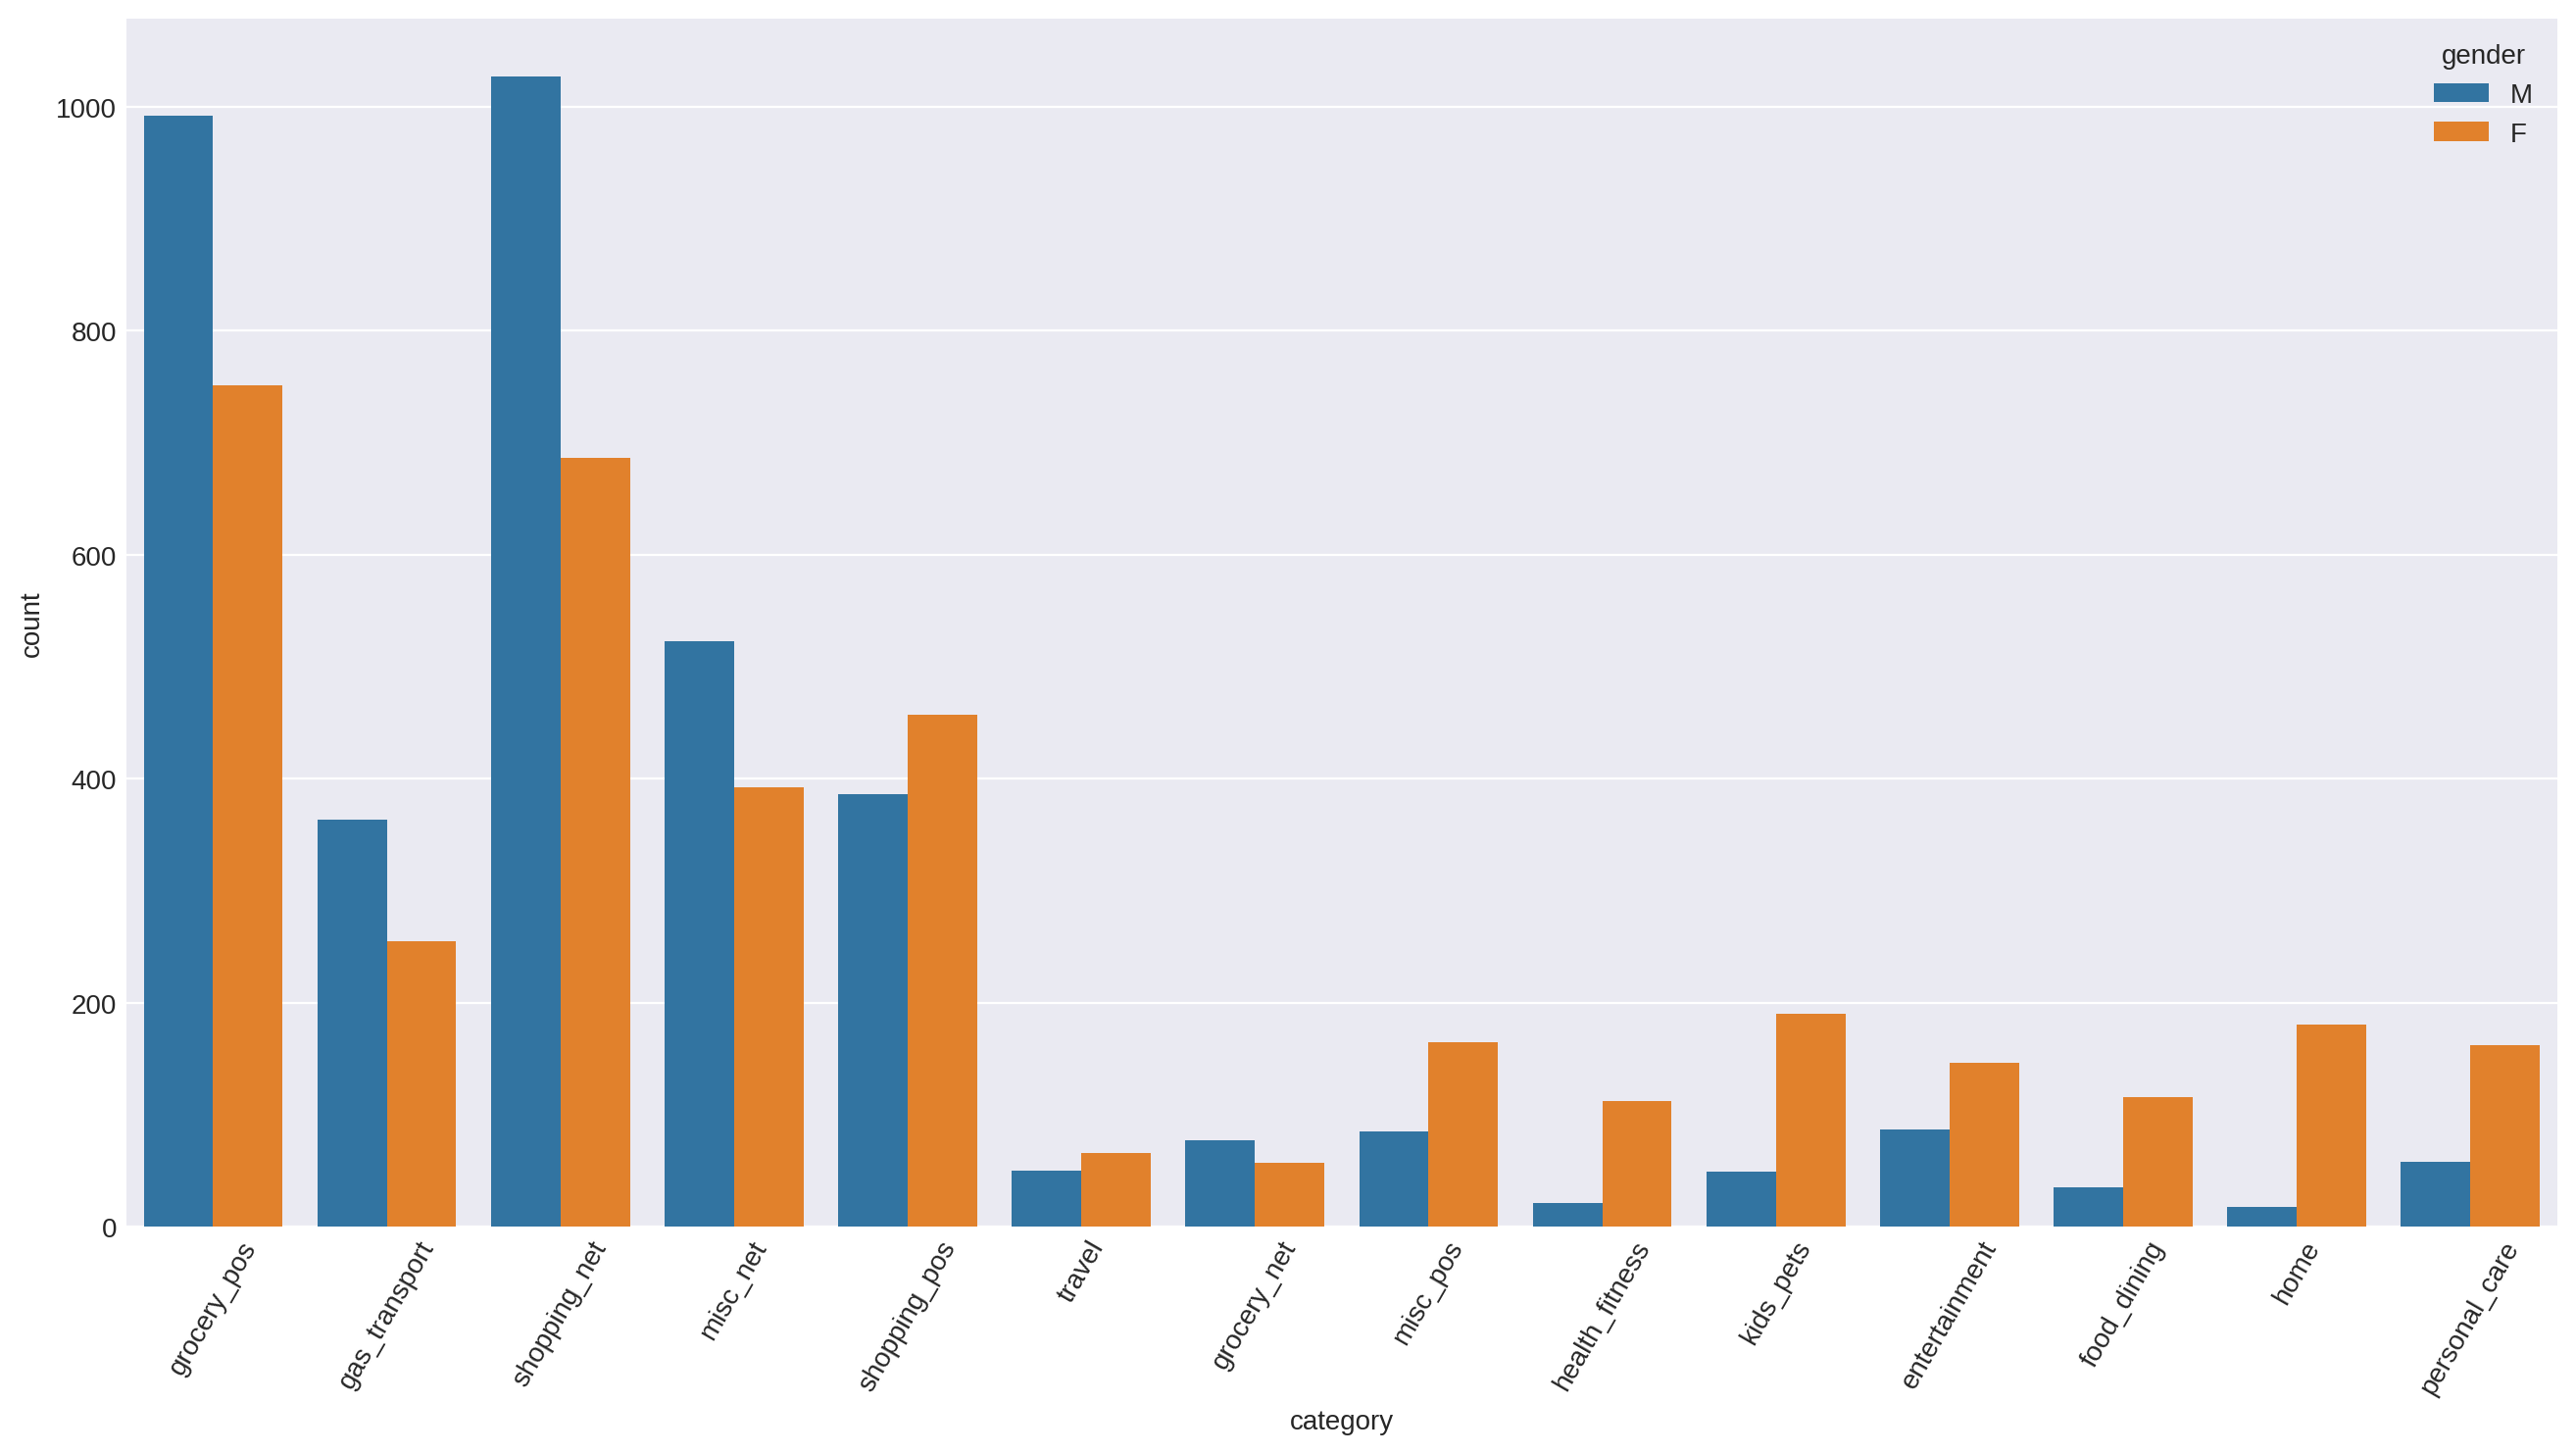

In [18]:
plt.figure(figsize = (16, 8), dpi = 200)
fraud = train[train["is_fraud"]==1]
sns.countplot(x = 'category', hue = 'gender', data = fraud)
plt.xticks(rotation = 60)
plt.show()

In [19]:
fraud.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age'],
      dtype='object')

In [20]:
fraud['trans_hour'].value_counts()

trans_hour
22    1931
23    1904
1      658
0      635
2      625
3      609
14      86
18      81
19      81
13      80
15      79
17      78
16      76
21      74
12      67
20      62
5       60
7       56
8       49
9       47
4       46
11      42
10      40
6       40
Name: count, dtype: int64

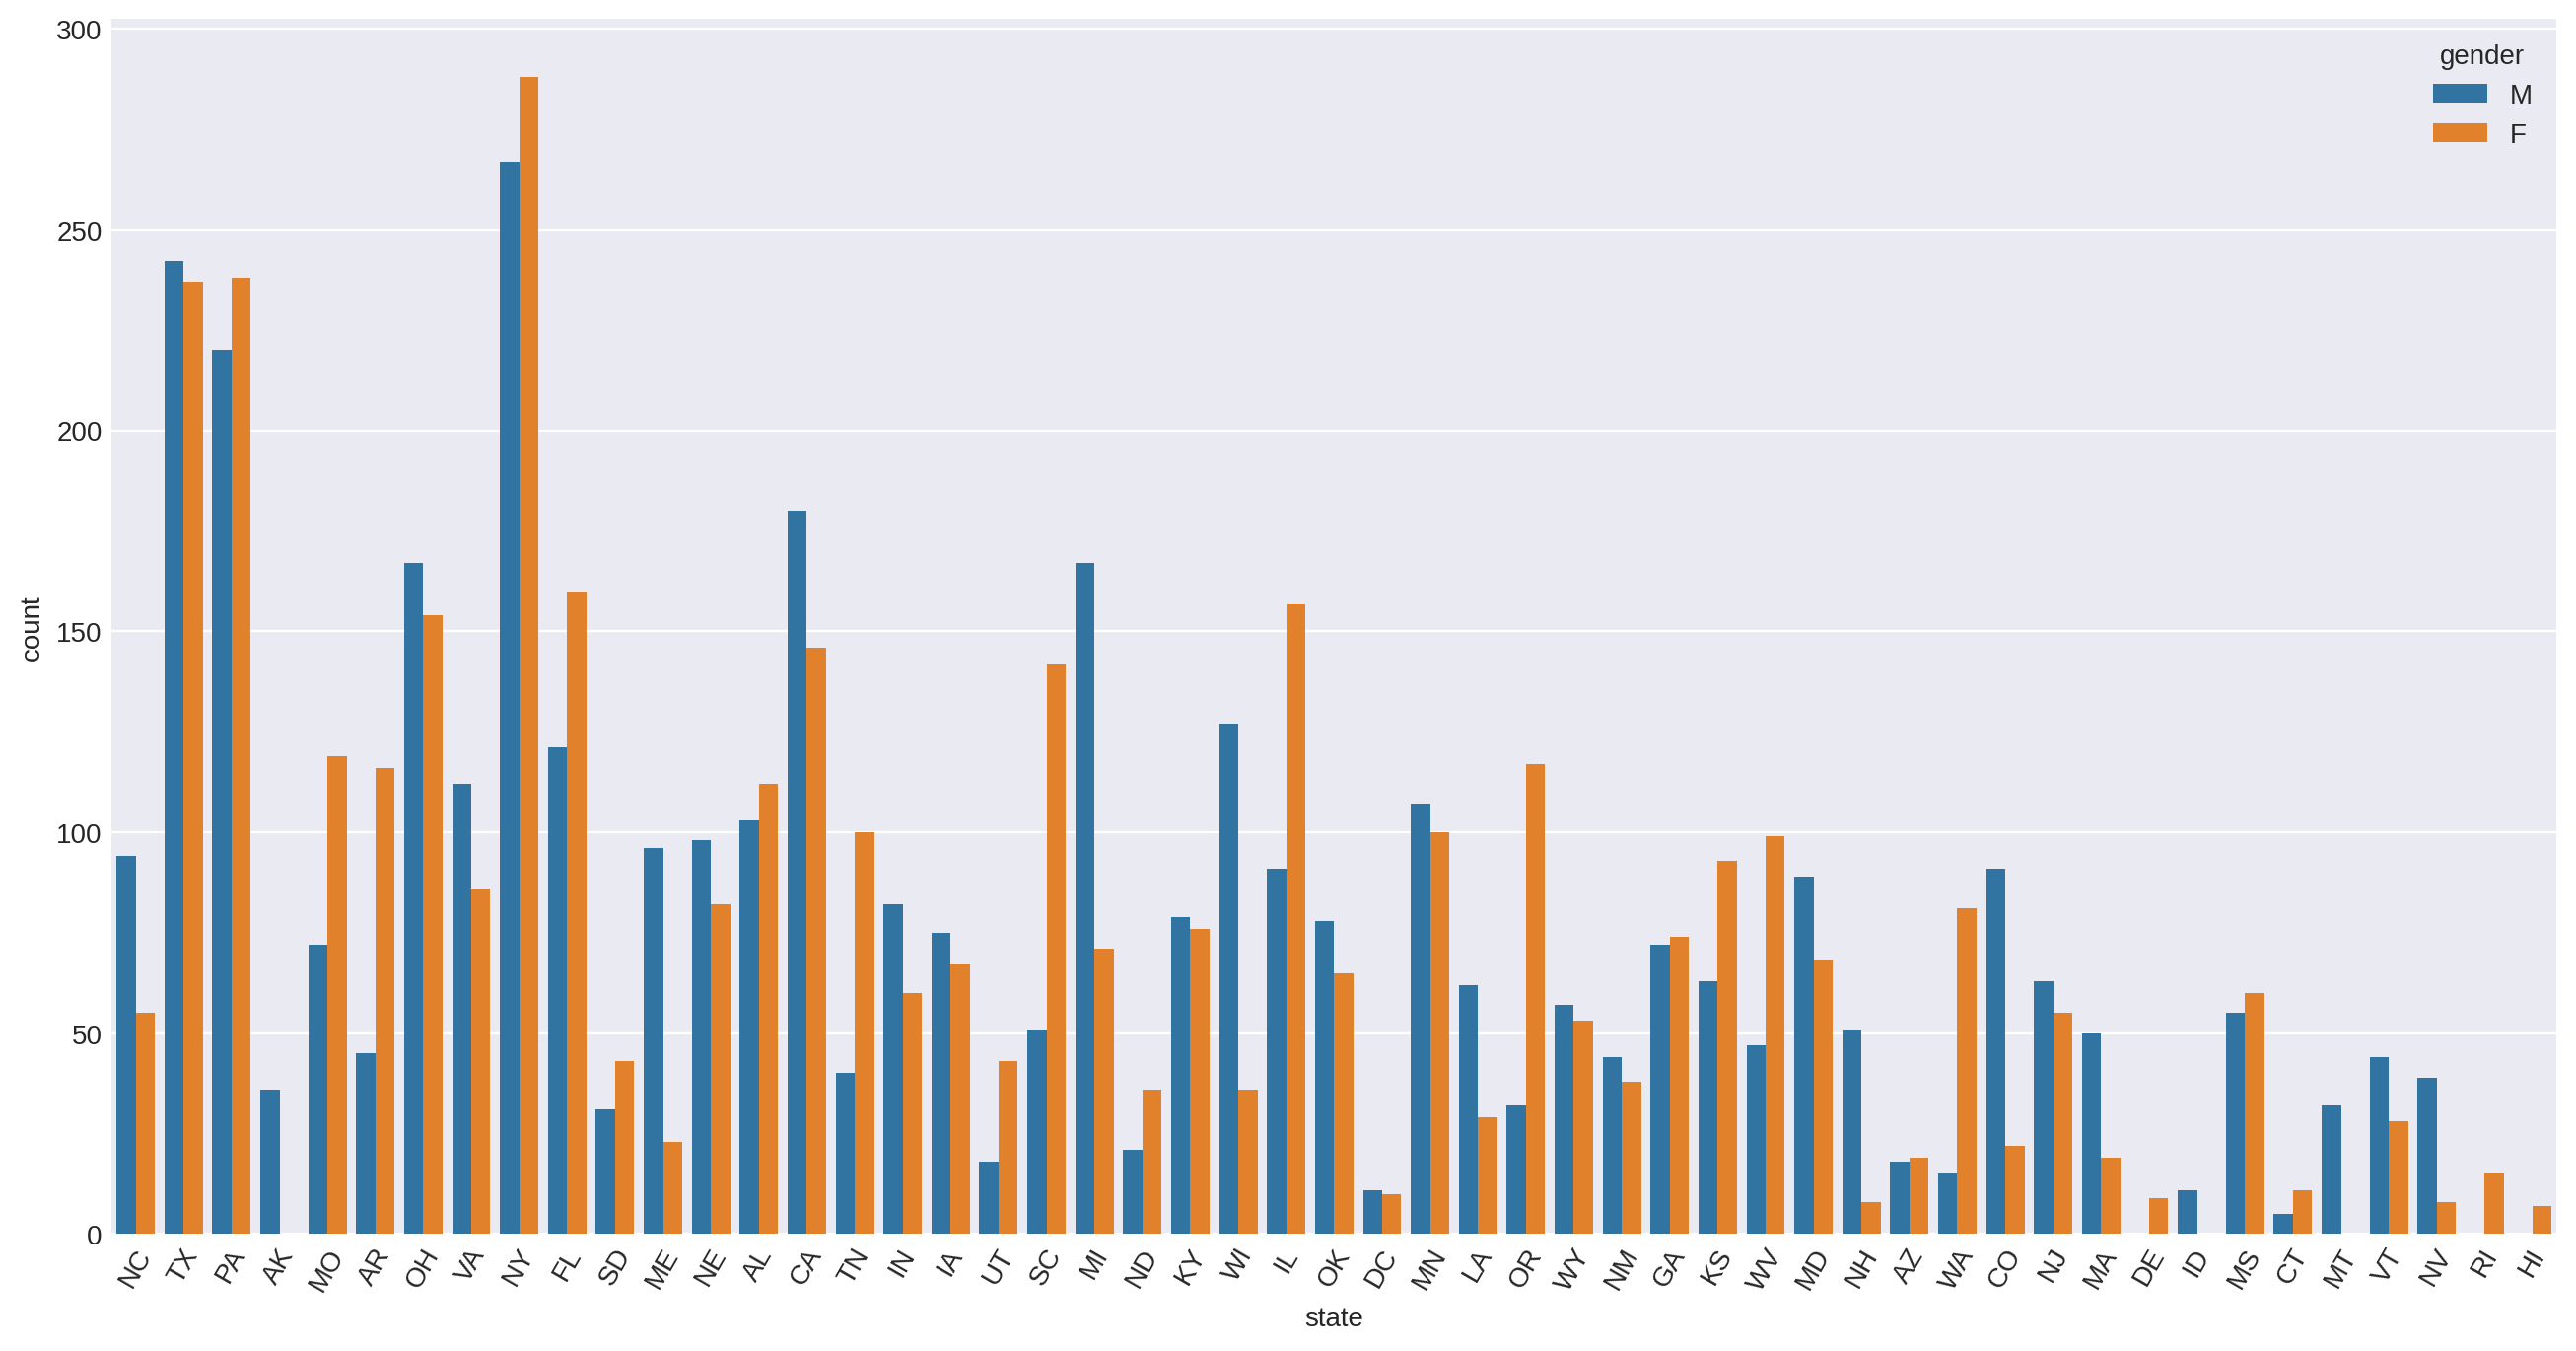

In [21]:
plt.figure(figsize = (16, 8), dpi = 200)
fraud = train[train["is_fraud"]==1]
sns.countplot(x = 'state', hue = 'gender', data = fraud)
plt.xticks(rotation = 60)
plt.show()

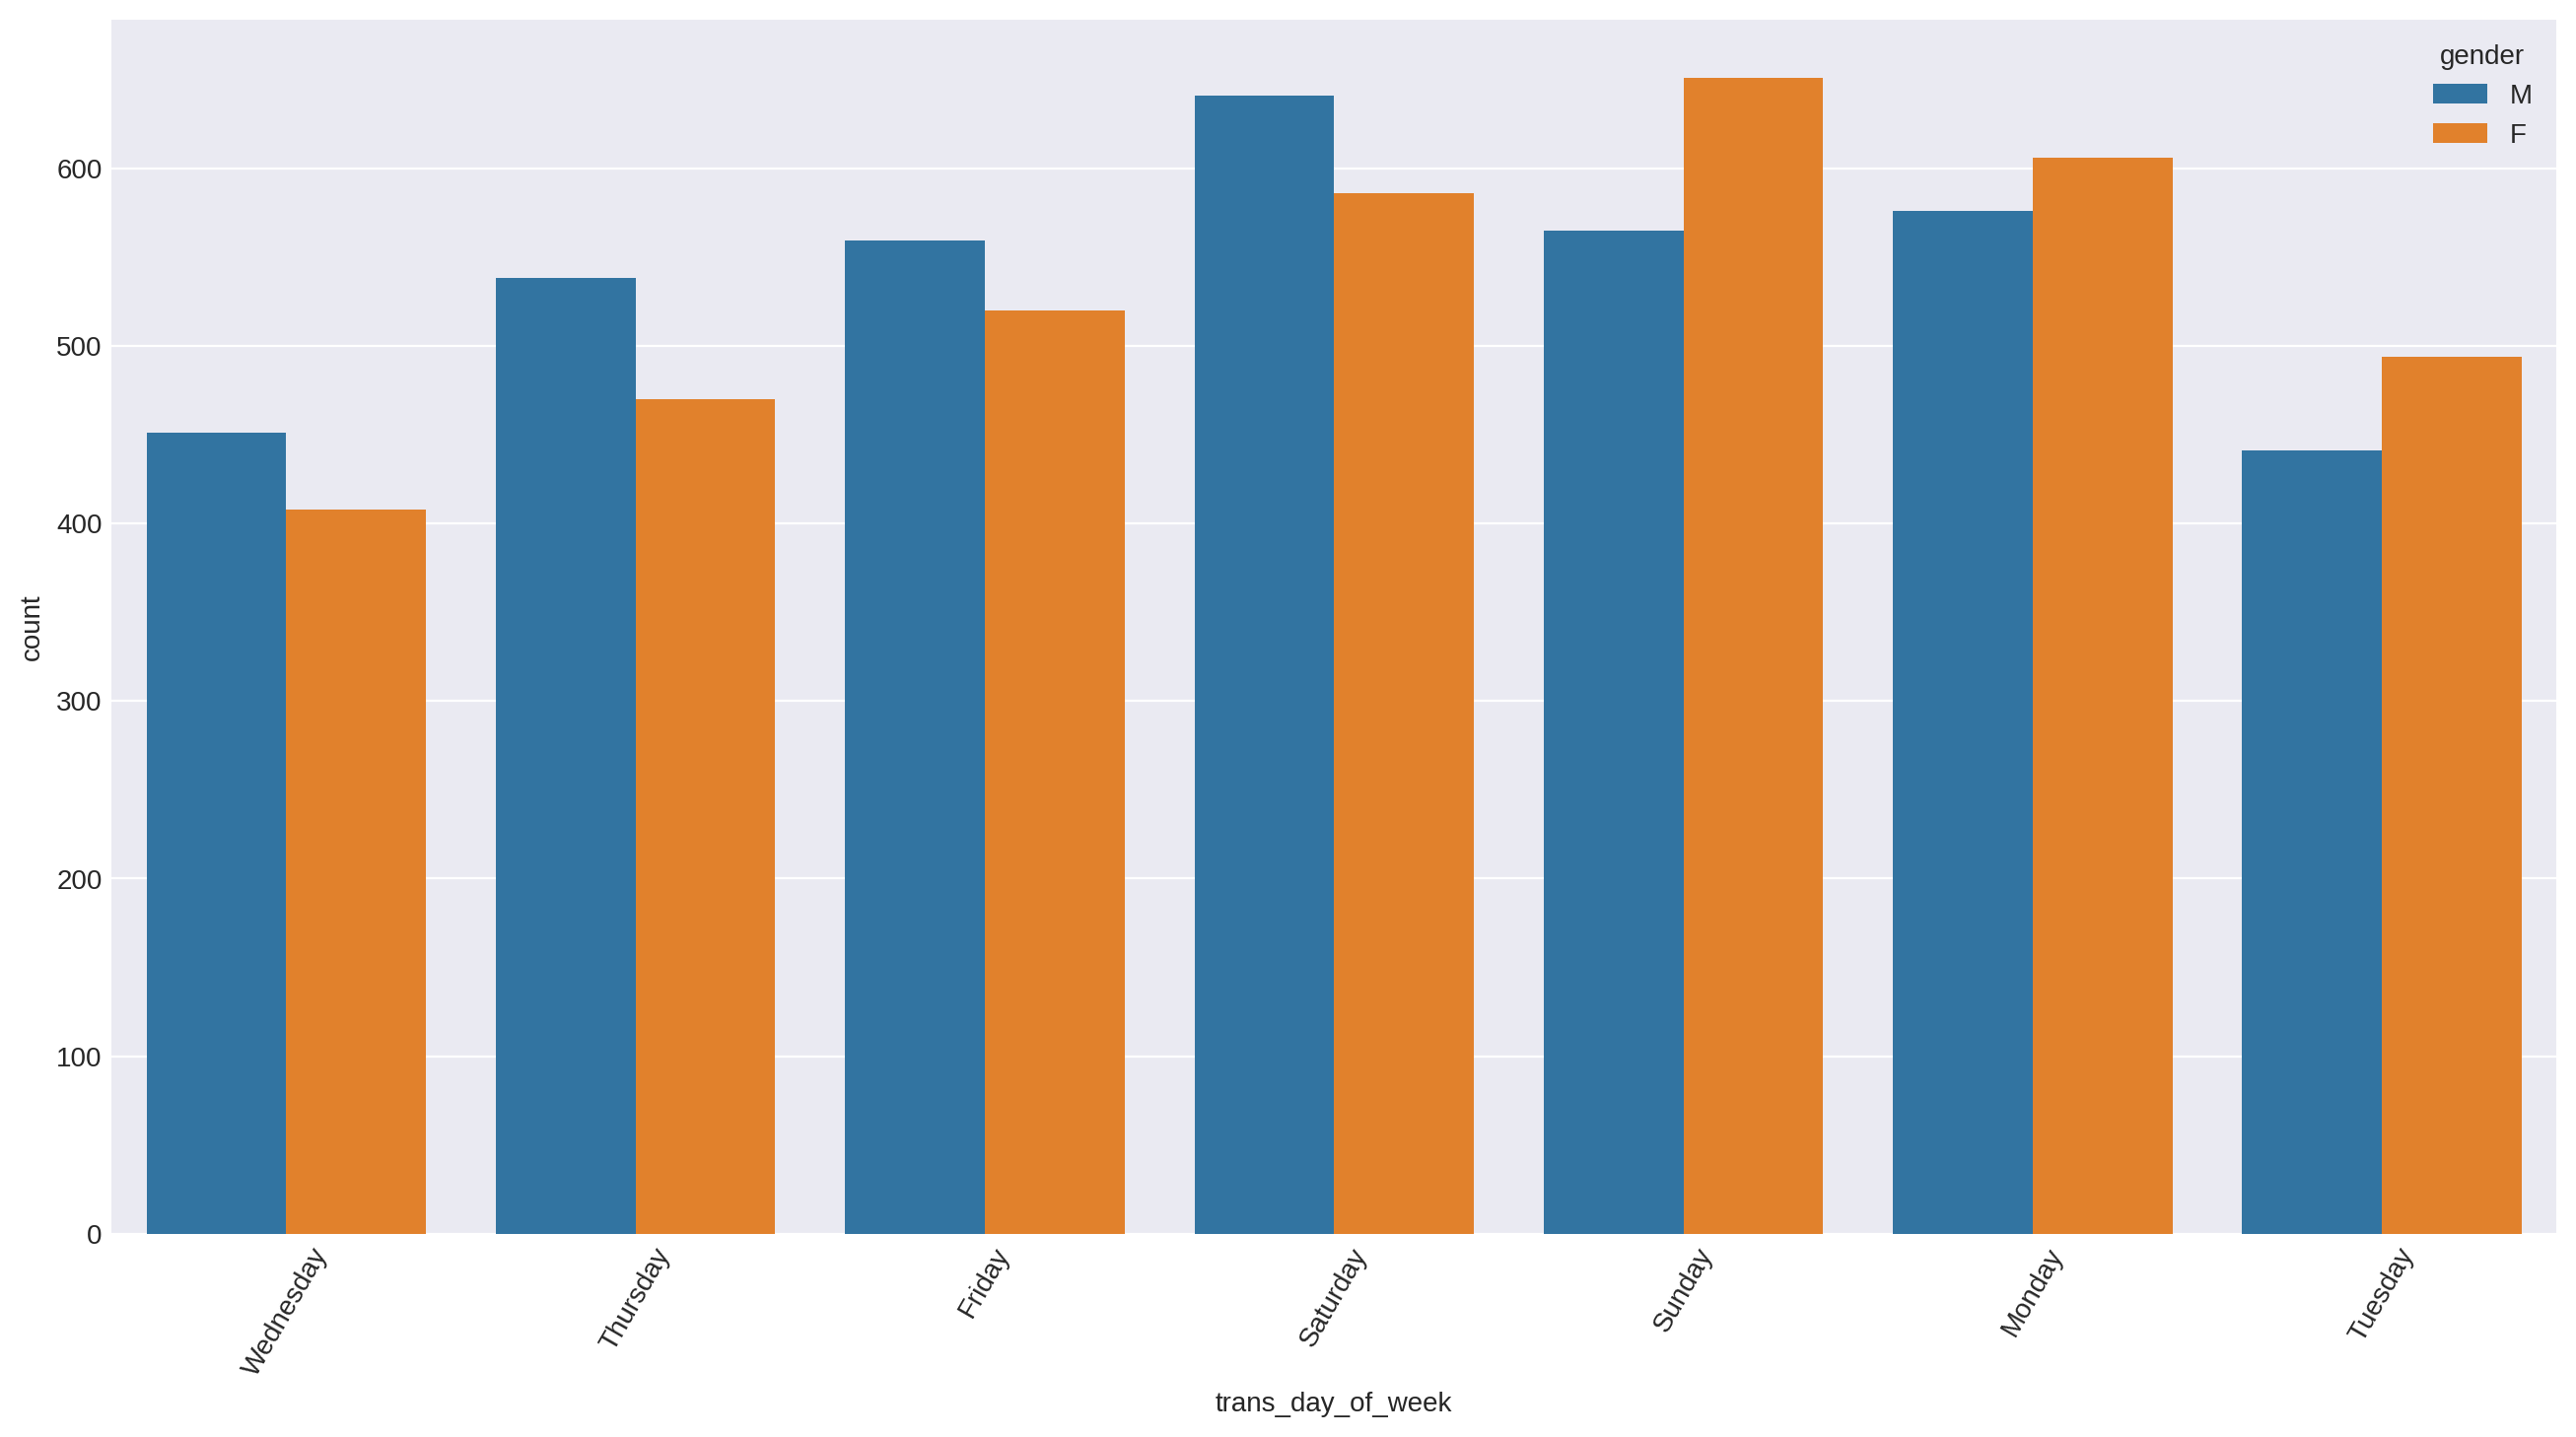

In [22]:
plt.figure(figsize = (16, 8), dpi = 200)
fraud = train[train["is_fraud"]==1]
sns.countplot(x = 'trans_day_of_week', hue = 'gender', data = fraud)
plt.xticks(rotation = 60)
plt.show()

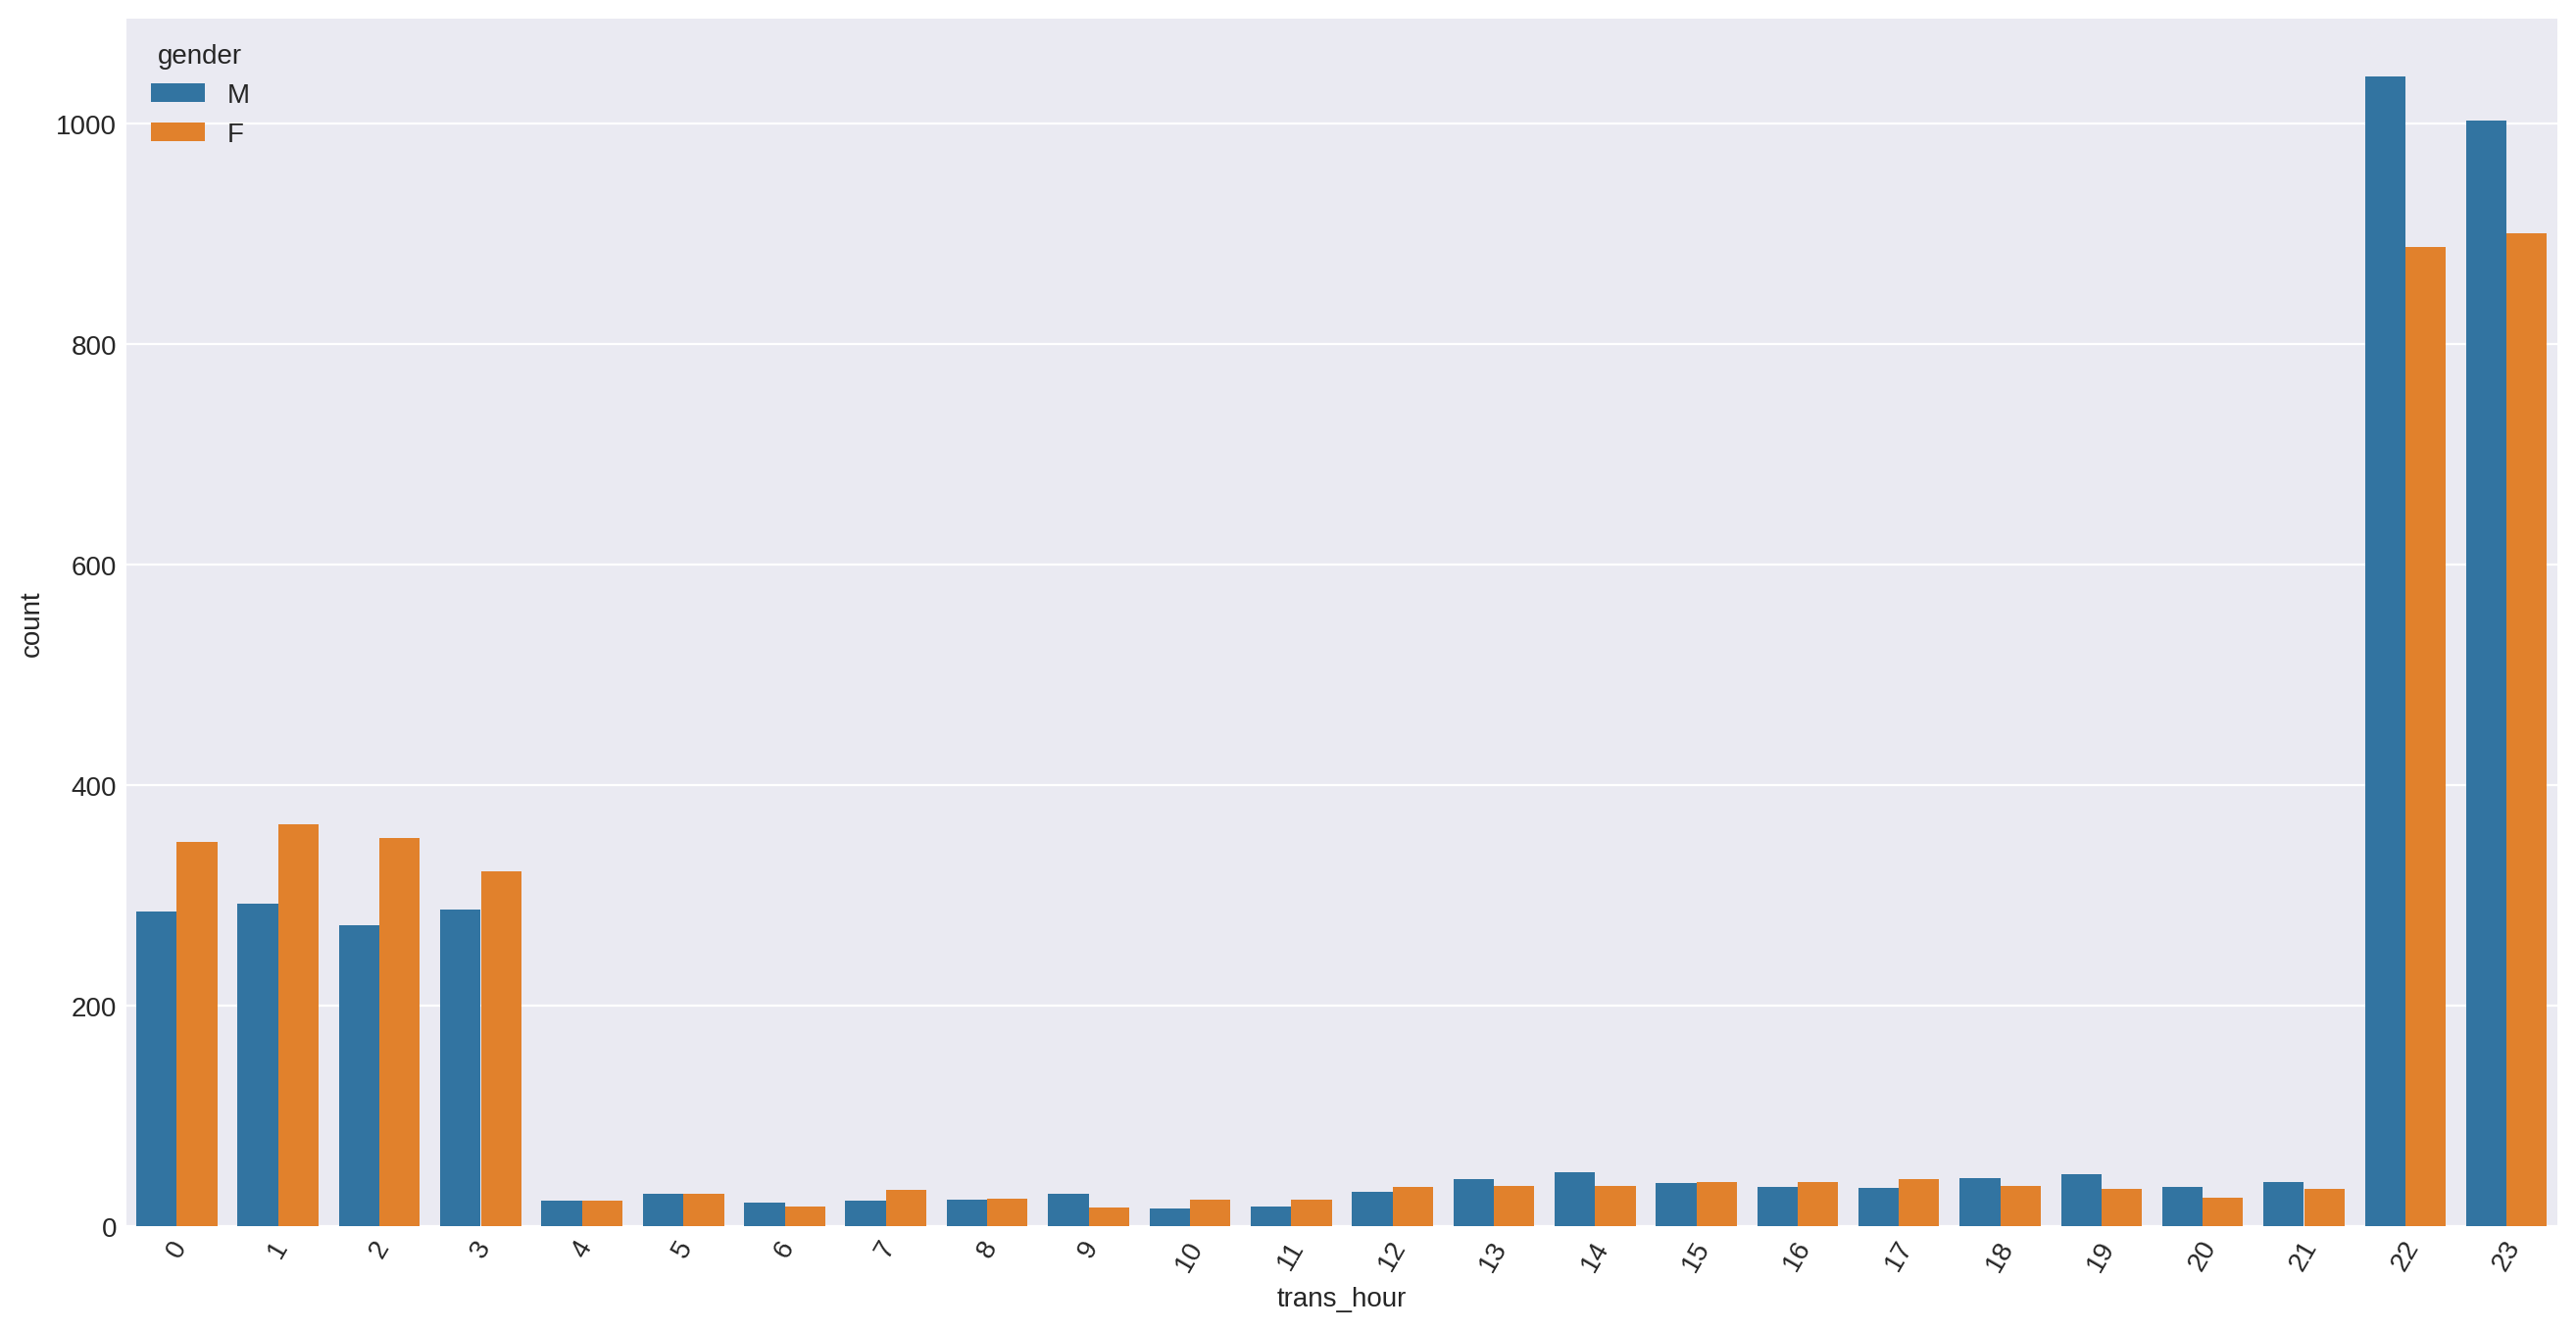

In [23]:
plt.figure(figsize = (16, 8), dpi = 200)
fraud = train[train["is_fraud"]==1]
sns.countplot(x = 'trans_hour', hue = 'gender', data = fraud)
plt.xticks(rotation = 60)
plt.show()

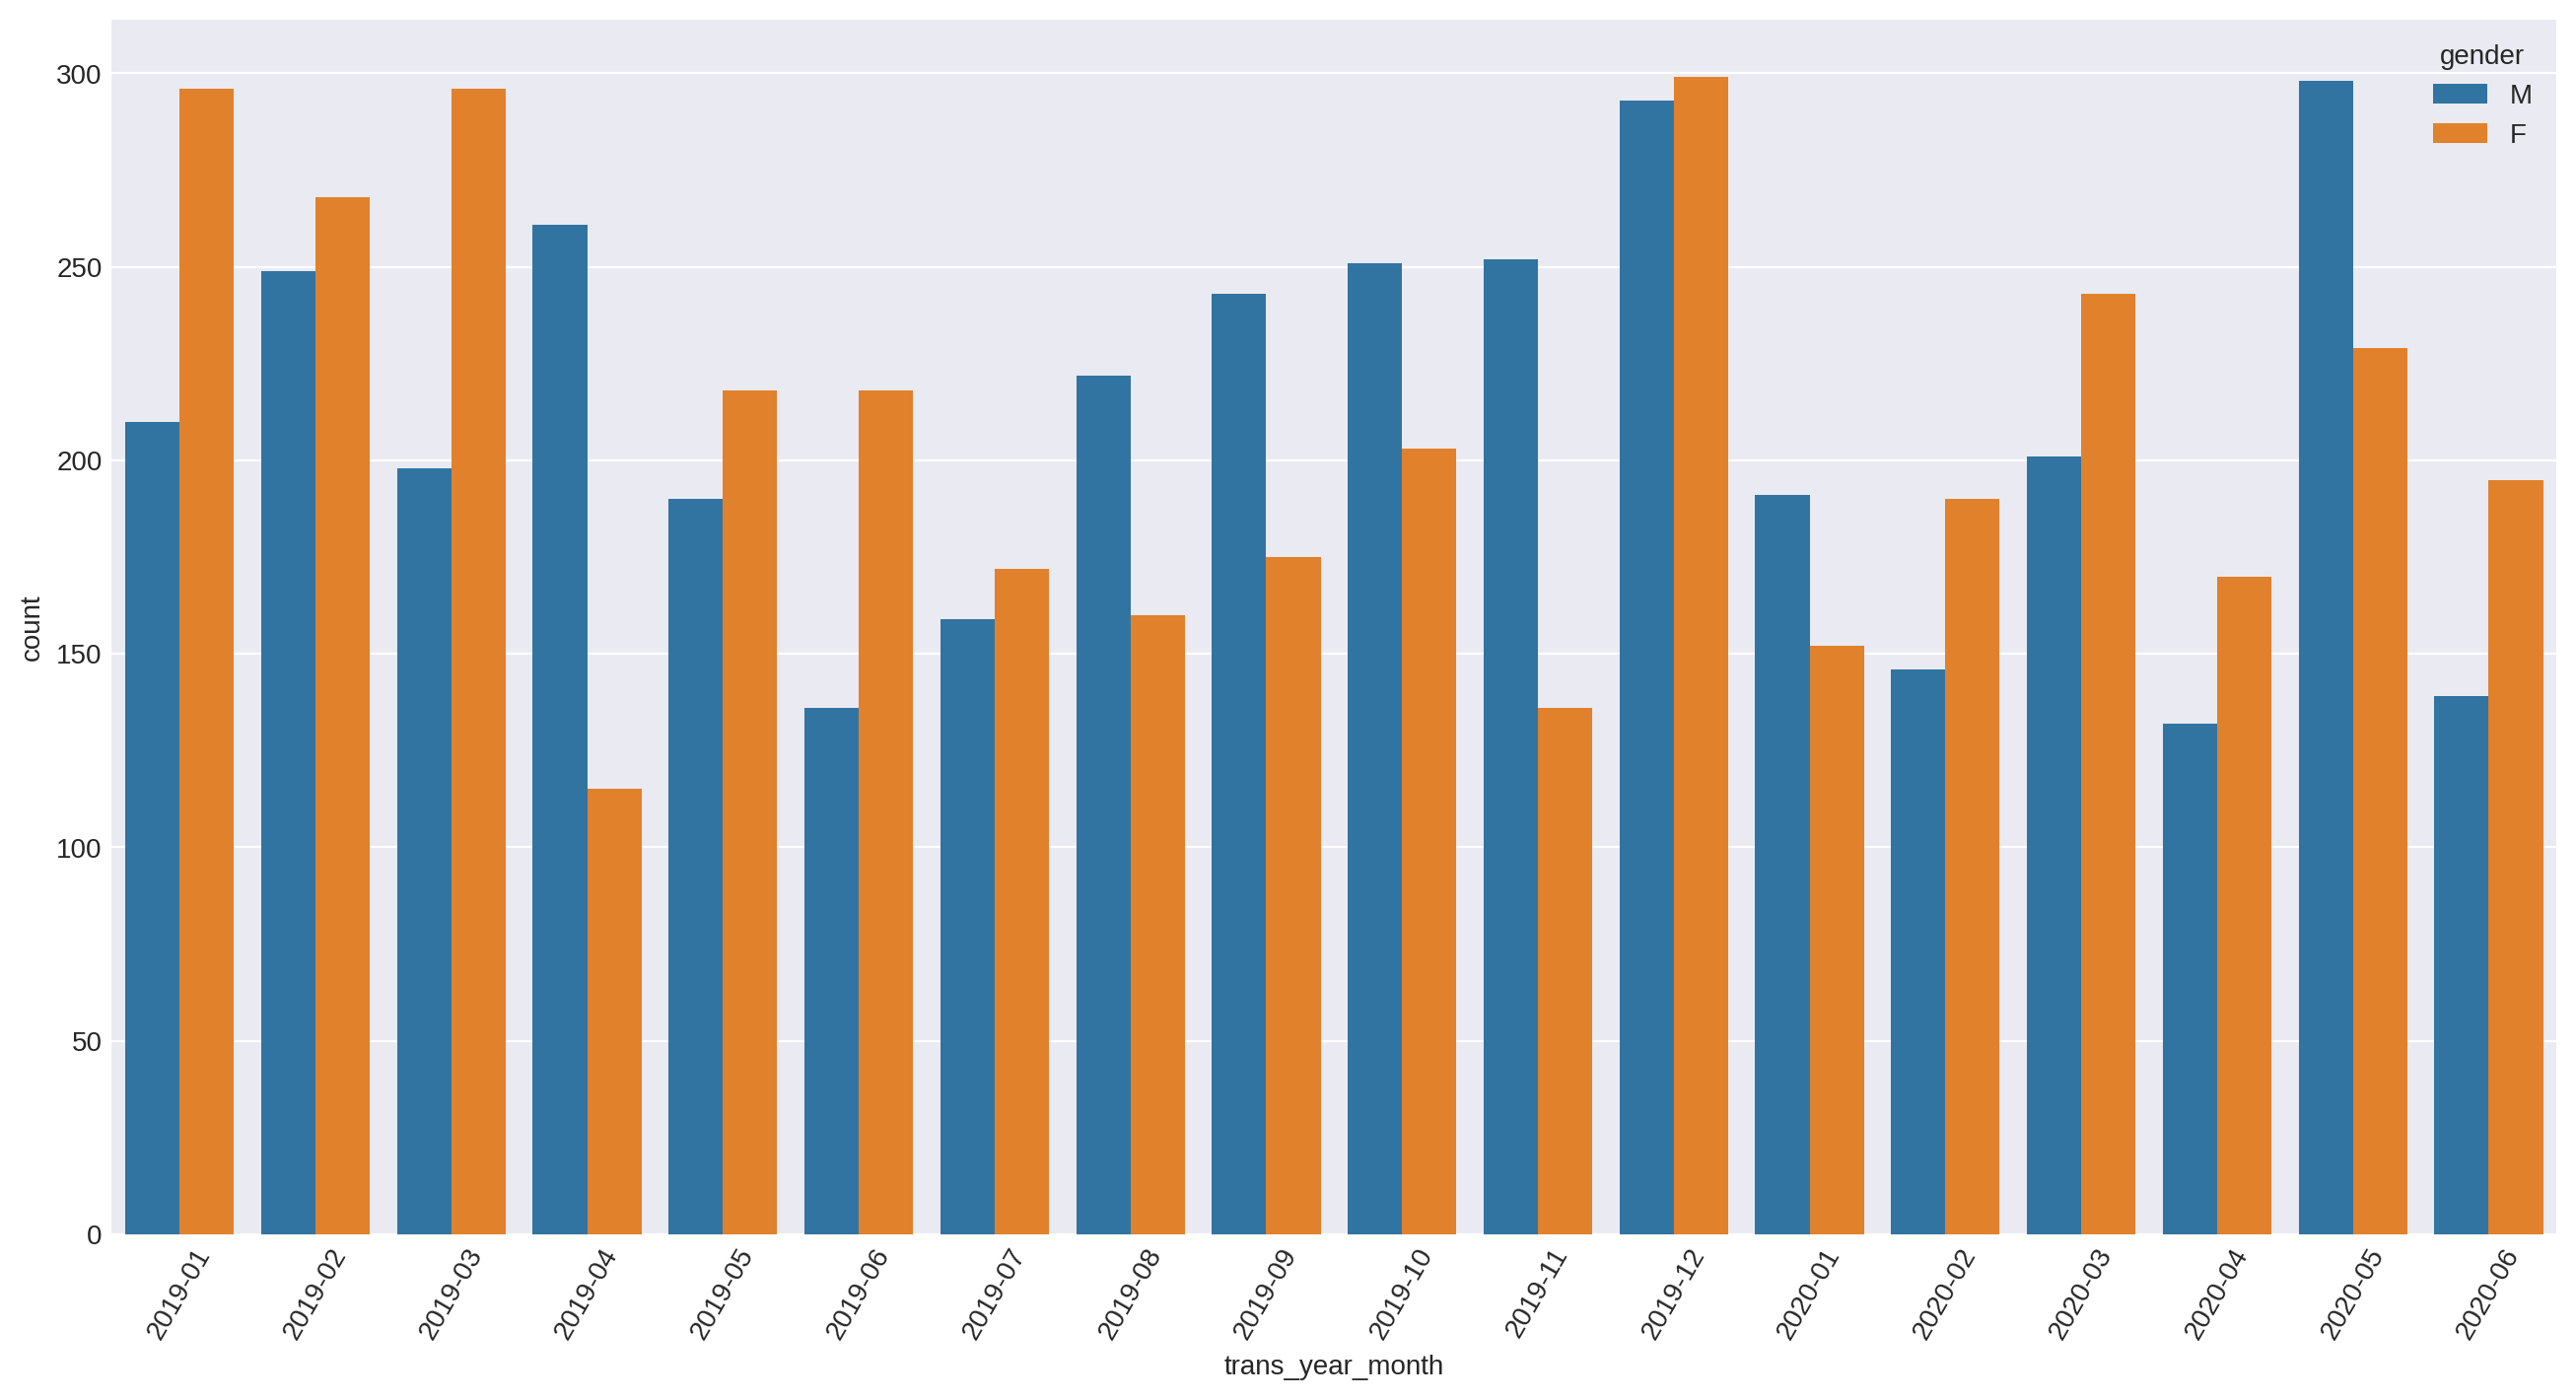

In [24]:
plt.figure(figsize = (16, 8), dpi = 200)
fraud = train[train["is_fraud"]==1]
sns.countplot(x = 'trans_year_month', hue = 'gender', data = fraud)
plt.xticks(rotation = 60)
plt.show()

### Step - 4: Feature Encoding

In [25]:
train.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age'],
      dtype='object')

In [26]:
df = train
# Convert boolean columns to categorical columns
df['category'] = df['category'].astype('category')
df['gender'] = df['gender'].astype('category')
df['trans_day_of_week'] = df['trans_day_of_week'].astype('category')
df['age'] = df['age'].astype('category')

#one-hot encoding the category variable
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True, dtype=int)
#one-hot encoding the gender variable
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True, dtype=int)
#one-hot encoding the day_of_week variable
day_of_week_onehot = pd.get_dummies(df.trans_day_of_week, prefix='day', drop_first=True, dtype=int)
#one-hot encoding the age variable
age_onehot = pd.get_dummies(df.age, prefix='age', drop_first=True, dtype=int)


In [27]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot,age_onehot], axis=1)

df1.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,age_46-60,age_61-75,age_< 30,age_> 75
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,30-45,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,30-45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,46-60,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,46-60,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,30-45,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [28]:
df1.drop([ 'cc_num', 'trans_num'], axis=1, inplace=True)
print(df1.shape)
df1.columns

(1296675, 44)


Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'trans_day_of_week',
       'trans_year_month', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'age_46-60', 'age_61-75', 'age_< 30', 'age_> 75'],
      dtype='object')

In [29]:
df1.drop(['merchant','street','city','state','job',
          'category','gender','trans_day_of_week',
          'age'],axis=1, inplace=True)
df1.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'trans_year_month',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'age_46-60', 'age_61-75', 'age_< 30',
       'age_> 75'],
      dtype='object')

In [30]:
#storing the number of values in each class
non_fraud_count, fraud_count = df1.is_fraud.value_counts()

In [31]:
#storing the numerical columns of the data and removing unnecessary variables
df_num = df1.select_dtypes(include='number')
df_num.drop(['zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long'],
            axis=1, inplace=True)
df_num.columns

Index(['amt', 'is_fraud', 'trans_hour', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'age_46-60', 'age_61-75', 'age_< 30', 'age_> 75'],
      dtype='object')

In [32]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   is_fraud                 1296675 non-null  int64  
 2   trans_hour               1296675 non-null  int32  
 3   category_food_dining     1296675 non-null  int64  
 4   category_gas_transport   1296675 non-null  int64  
 5   category_grocery_net     1296675 non-null  int64  
 6   category_grocery_pos     1296675 non-null  int64  
 7   category_health_fitness  1296675 non-null  int64  
 8   category_home            1296675 non-null  int64  
 9   category_kids_pets       1296675 non-null  int64  
 10  category_misc_net        1296675 non-null  int64  
 11  category_misc_pos        1296675 non-null  int64  
 12  category_personal_care   1296675 non-null  int64  
 13  category_shopping_net    1296675 non-null 

In [33]:
#innput-output split
X = df_num.drop(['is_fraud'],axis=1)
y = df_num.is_fraud

In [34]:
#scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
import pickle as pic
with open('scaler.pkl', 'wb') as f:
    pic.dump(scaler, f)

In [36]:
# charger le scaler depuis le fichier
# with open('scaler.pkl', 'rb') as f:
    # scaler = pickle.load(f)

# utiliser le scaler pour effectuer une prédiction
# X_new = scaler.transform(X_new)


## Logistic Regression

In [37]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
#train-test split using stratified K fold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

y_train.value_counts()

is_fraud
0    644585
1      3753
Name: count, dtype: int64

In [39]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


In [40]:
#evaluating the model
model_name = 'Logistic Regression - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993793,0.993829,0.993829,0.991160,0.033835,0.002398


In [ ]:
pic.dump(model, open('lostic_wo_balanced.pkl', 'wb'))

Confusion matrix, without normalization


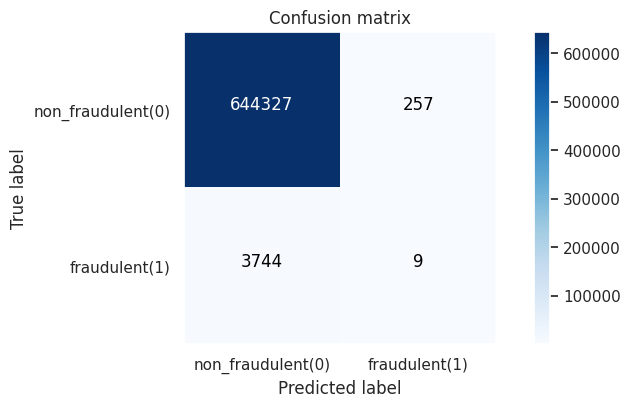

In [41]:
pred_test  = model.predict(X_test)
# Plotting the confusion metrics
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

Oversampling - SMOTE method:

In [42]:
#balancing using SMOTE method
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train.astype('float'), y_train)

y_sm.value_counts()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9ee745f760>
Traceback (most recent call last):
  File "/home/kamila/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/kamila/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/kamila/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/kamila/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


is_fraud
0    644585
1    644585
Name: count, dtype: int64

In [43]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm)
y_train.value_counts()

is_fraud
1    451210
0    451209
Name: count, dtype: int64

In [44]:
#implementing logistic regression
lr = LogisticRegression(random_state=42)
#creating model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 1, 1, ..., 1, 0, 0])

In [45]:
#renaming X_test and y_test variables
test_input = X_test.copy()
test_output = y_test.copy()

test_output.value_counts(normalize=True)

is_fraud
0   0.500001
1   0.499999
Name: proportion, dtype: float64

In [46]:
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 1, 1, 0])

In [47]:
#printing classification report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82    193376
           1       0.85      0.74      0.79    193375

    accuracy                           0.80    386751
   macro avg       0.81      0.80      0.80    386751
weighted avg       0.81      0.80      0.80    386751



In [48]:
pic.dump(model, open('lostic_SMOTE.pkl', 'wb'))

Feature Balancing

In [49]:
#renaming X_test and y_test variables
test_input = X_test.copy()
test_output = y_test.copy()

test_output.value_counts(normalize=True)

is_fraud
0   0.500001
1   0.499999
Name: proportion, dtype: float64

In [50]:
#storing all fraud transactions
fraud_trans = df_num[df_num['is_fraud'] == 1]
non_fraud_trans = df_num[df_num['is_fraud'] == 0]

print('fraud data shape: ', fraud_trans.shape)
print('non fraud data shape: ', non_fraud_trans.shape)

#printing fraud data percentage
print('Fraud Data percentage: ', 100*(len(fraud_trans)/len(non_fraud_trans)))

fraud data shape:  (7506, 27)
non fraud data shape:  (1289169, 27)
Fraud Data percentage:  0.5822355331224999


1) Undersampling - Random Undersampling:

In [51]:
#random under sampling using imblearn
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)

y_rus.value_counts()

is_fraud
0    451209
1    451209
Name: count, dtype: int64

In [52]:
pic.dump(rus, open('lostic_undersampling.pkl', 'wb'))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)

In [54]:
y_train.value_counts()

is_fraud
0    315846
1    315846
Name: count, dtype: int64

In [55]:
#creating a baseline linear model
lr = LogisticRegression(random_state=42)
#model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([1, 0, 0, ..., 1, 1, 1])

In [56]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([0, 0, 0, ..., 1, 1, 0])

In [57]:
pic.dump(model, open('lostic_imbalanced.pkl', 'wb'))

In [58]:
#printing the classification report of the model
print(classification_report(test_output,test_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82    193376
           1       0.85      0.74      0.79    193375

    accuracy                           0.80    386751
   macro avg       0.81      0.80      0.80    386751
weighted avg       0.81      0.80      0.80    386751



In [59]:
#evaluating the model
model_name = 'Logistic Regression - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)

# adding claculations to dataframe
model_eval_data = pd.DataFrame([[model_name, train_score, test_score, acc_score, f_score, precision, recall]], 
                               columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])


evaluate_df = pd.concat([evaluate_df, model_eval_data], ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993793,0.993829,0.993829,0.991160,0.033835,0.002398
1,Logistic Regression - Random Under Sampling,0.804052,0.804230,0.803796,0.802926,0.850355,0.737350


Confusion matrix, without normalization


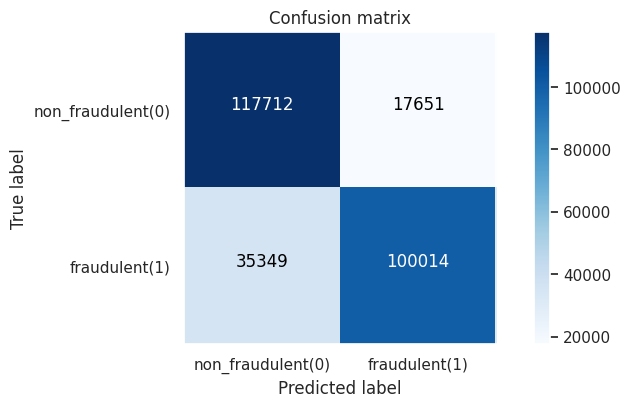

In [60]:
pred_test  = model.predict(X_test)
# Plotting the confusion metrics
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

2) Oversampling - Random Over Sampling:

In [61]:
#oversampling with imblearn
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train,y_train)

y_ros.value_counts()

is_fraud
0    315846
1    315846
Name: count, dtype: int64

In [62]:
#train Test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, stratify=y_ros, random_state=42)
y_train.value_counts()

is_fraud
1    221092
0    221092
Name: count, dtype: int64

In [63]:
#implementing logistic regression
lr = LogisticRegression(random_state=42)
#creating model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([1, 1, 0, ..., 0, 0, 0])

In [64]:
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 1, 1, 0])

In [65]:
#printing classification report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82    193376
           1       0.85      0.74      0.79    193375

    accuracy                           0.80    386751
   macro avg       0.81      0.80      0.80    386751
weighted avg       0.81      0.80      0.80    386751



In [66]:
#evaluating the model
model_name = 'Logistic Regression - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)

# adding claculations to dataframe
model_eval_data = pd.DataFrame([[model_name, train_score, test_score, acc_score, f_score, precision, recall]], 
                               columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])


evaluate_df = pd.concat([evaluate_df, model_eval_data], ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993793,0.993829,0.993829,0.991160,0.033835,0.002398
1,Logistic Regression - Random Under Sampling,0.804052,0.804230,0.803796,0.802926,0.850355,0.737350
2,Logistic Regression - Random Over Sampling,0.803785,0.805581,0.804104,0.803230,0.850854,0.737479


Confusion matrix, without normalization


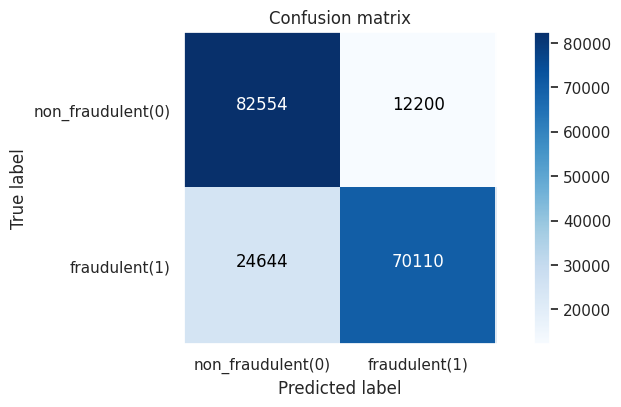

In [67]:
pred_test  = model.predict(X_test)
# Plotting the confusion metrics
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

3) Oversampling - SMOTE method:

In [68]:
#balancing using SMOTE method
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train.astype('float'), y_train)

y_sm.value_counts()

is_fraud
1    221092
0    221092
Name: count, dtype: int64

In [69]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm)
y_train.value_counts()

is_fraud
1    154764
0    154764
Name: count, dtype: int64

In [70]:
#implementing logistic regression
lr = LogisticRegression(random_state=42)
#creating model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([1, 1, 0, ..., 0, 0, 0])

In [71]:
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 1, 1, 0])

In [72]:
#printing classification report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82    193376
           1       0.85      0.74      0.79    193375

    accuracy                           0.80    386751
   macro avg       0.81      0.80      0.80    386751
weighted avg       0.81      0.80      0.80    386751



In [73]:
pic.dump(model, open('lostic_SMOTE.pkl', 'wb'))

In [74]:
#evaluating the model
model_name = 'Logistic Regression - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)

# adding claculations to dataframe
model_eval_data = pd.DataFrame([[model_name, train_score, test_score, acc_score, f_score, precision, recall]], 
                               columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])


evaluate_df = pd.concat([evaluate_df, model_eval_data], ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993793,0.993829,0.993829,0.991160,0.033835,0.002398
1,Logistic Regression - Random Under Sampling,0.804052,0.804230,0.803796,0.802926,0.850355,0.737350
2,Logistic Regression - Random Over Sampling,0.803785,0.805581,0.804104,0.803230,0.850854,0.737479
3,Logistic Regression - SMOTE,0.803976,0.802768,0.803998,0.803129,0.850571,0.737572


Confusion matrix, without normalization


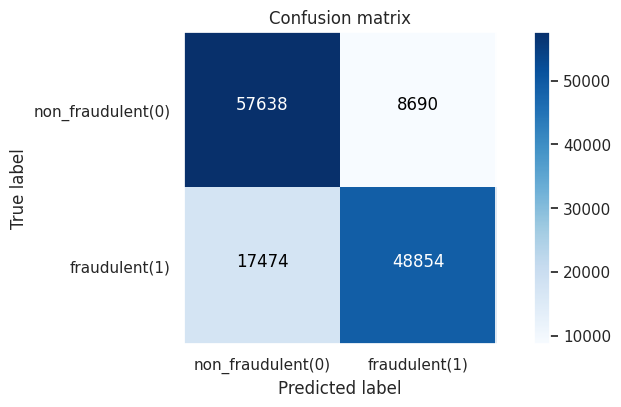

In [75]:
pred_test  = model.predict(X_test)
# Plotting the confusion metrics
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

Random Forest Classifier Oversampling - SMOTE:

In [76]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)

# adding claculations to dataframe
model_eval_data = pd.DataFrame([[model_name, train_score, test_score, acc_score, f_score, precision, recall]], 
                               columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])


evaluate_df = pd.concat([evaluate_df, model_eval_data], ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193376
           1       1.00      1.00      1.00    193375

    accuracy                           1.00    386751
   macro avg       1.00      1.00      1.00    386751
weighted avg       1.00      1.00      1.00    386751



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993793,0.993829,0.993829,0.991160,0.033835,0.002398
1,Logistic Regression - Random Under Sampling,0.804052,0.804230,0.803796,0.802926,0.850355,0.737350
2,Logistic Regression - Random Over Sampling,0.803785,0.805581,0.804104,0.803230,0.850854,0.737479
3,Logistic Regression - SMOTE,0.803976,0.802768,0.803998,0.803129,0.850571,0.737572
4,Random Forest - SMOTE,1.000000,0.997128,0.996998,0.996998,0.996128,0.997875


In [77]:
pic.dump(model, open('Random_forest.pkl', 'wb'))

Confusion matrix, without normalization


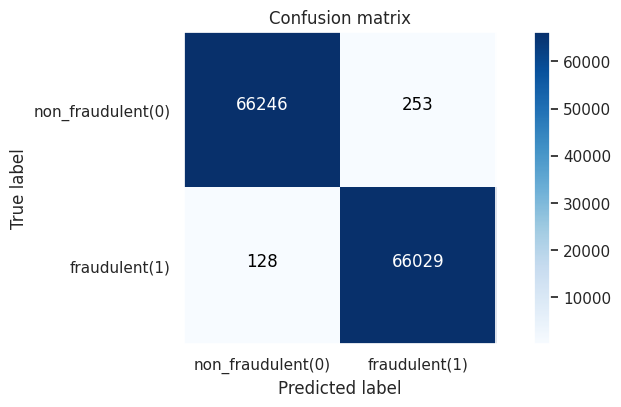

In [78]:
pred_test  = model.predict(X_test)
# Plotting the confusion metrics
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

Hyper-parameter Tuning for Random Forest:

In [79]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [80]:
best_grid = RandomForestClassifier(max_features = 'sqrt', n_estimators=200, random_state=42)
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)

model = best_grid.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - SMOTE [Hyperparameter Tuned]'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)

# adding claculations to dataframe
model_eval_data = pd.DataFrame([[model_name, train_score, test_score, acc_score, f_score, precision, recall]], 
                               columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])


evaluate_df = pd.concat([evaluate_df, model_eval_data], ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193376
           1       1.00      1.00      1.00    193375

    accuracy                           1.00    386751
   macro avg       1.00      1.00      1.00    386751
weighted avg       1.00      1.00      1.00    386751



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993793,0.993829,0.993829,0.991160,0.033835,0.002398
1,Logistic Regression - Random Under Sampling,0.804052,0.804230,0.803796,0.802926,0.850355,0.737350
2,Logistic Regression - Random Over Sampling,0.803785,0.805581,0.804104,0.803230,0.850854,0.737479
3,Logistic Regression - SMOTE,0.803976,0.802768,0.803998,0.803129,0.850571,0.737572
4,Random Forest - SMOTE,1.000000,0.997128,0.996998,0.996998,0.996128,0.997875
5,Random Forest - SMOTE [Hyperparameter Tuned],1.000000,0.997105,0.996931,0.996931,0.996036,0.997833


In [81]:
pic.dump(model, open('RF_SMOTE.pkl', 'wb'))

Confusion matrix, without normalization


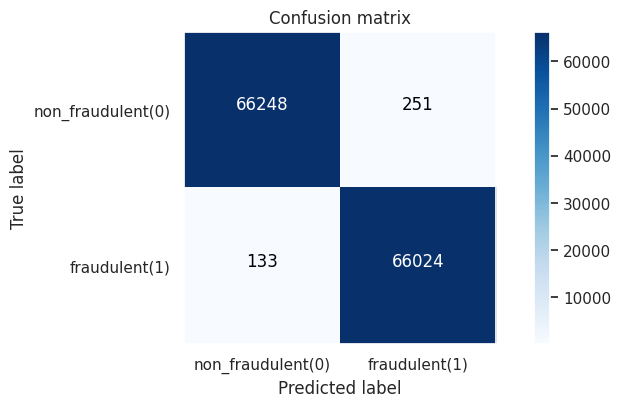

In [82]:
pred_test  = model.predict(X_test)
# Plotting the confusion metrics
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

Decision Tree Oversampling SMOTE:

In [83]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Decision Tree - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)

# adding claculations to dataframe
model_eval_data = pd.DataFrame([[model_name, train_score, test_score, acc_score, f_score, precision, recall]], 
                               columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])


evaluate_df = pd.concat([evaluate_df, model_eval_data], ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    193376
           1       0.96      0.99      0.97    193375

    accuracy                           0.97    386751
   macro avg       0.97      0.97      0.97    386751
weighted avg       0.97      0.97      0.97    386751



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993793,0.993829,0.993829,0.991160,0.033835,0.002398
1,Logistic Regression - Random Under Sampling,0.804052,0.804230,0.803796,0.802926,0.850355,0.737350
2,Logistic Regression - Random Over Sampling,0.803785,0.805581,0.804104,0.803230,0.850854,0.737479
3,Logistic Regression - SMOTE,0.803976,0.802768,0.803998,0.803129,0.850571,0.737572
4,Random Forest - SMOTE,1.000000,0.997128,0.996998,0.996998,0.996128,0.997875
5,Random Forest - SMOTE [Hyperparameter Tuned],1.000000,0.997105,0.996931,0.996931,0.996036,0.997833
6,Decision Tree - SMOTE,0.975298,0.974792,0.974278,0.974272,0.960698,0.989016


In [84]:
pic.dump(model, open('Dtree_smote.pkl', 'wb'))

Confusion matrix, without normalization


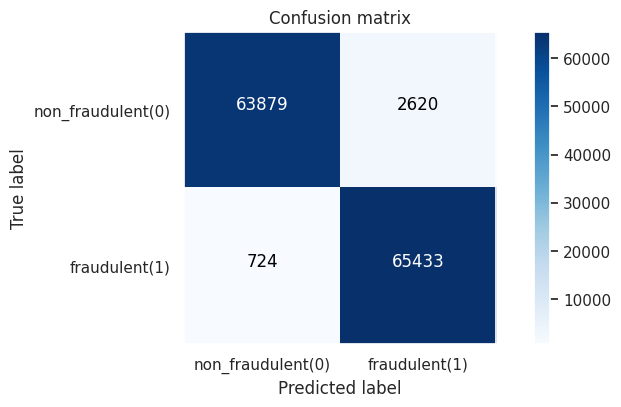

In [85]:
pred_test  = model.predict(X_test)
# Plotting the confusion metrics
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

## Conclusion:
### Exploratory Data Analysis:
various features of the data set have been analyzed and several insights have been obtained.
The 'trans_date_trans_time' feature has been broken down into several components like 'Age', 'day of the week', 'month' in order to facilitate our analysis.
These features have been thoroughly analyzed. It has been found that most transaction are being done after 12 noon and that during holiday seasons, the number of transaction along with the number of fraudulent transactions will increase.
Old age people above 75 years are more susseptible to frauds. This is because, fraudsters might try to take advantage of their lack of knowledge about the constantly changing ways of how transactions are made.

The 'Female' gender people have been observed to do much of the transaction according to the dataset. Hence, transactions involving might be much prone to fraud.
Also, by analyzing several demographic variables like city, state, zip etc it has been found that, several places like 'DE' state has 100% fraud rate and about 50 zip codes and 70 cities have 100% fraud rate. There might be some ill practices happening at the ground level at these places since all the transactions happening there are shown as fraudulent.
Similarly, several job profiles wherein a 100% fraud rate is seen can also be checked for descripencies.
In the categories feature, gas_transport, grocery_pos, home, shopping_pos, kids_pets are the top 5 most categories with most fraud rates. Most of these categories seem to involve either an online transaction sale or a POS sale. There might be some issue on those fronts like tampered POS machines, or hacked transaction gateway which can be checked by the company.
In the Merchant category the merchants fraud_Kozey-Boehm; fraud_Herman, Treutel and Dickens have a higher than usual amount of fraudulent transactions associated with them. And hence, even they can be checked for malpractices.
### Model Building:
The features 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long' have been asumed to provide no significant information in the model building phase. Hence, they along with the original features that have been encoded have been dropped from the dataset.
3 different algorithms have been implemented upon the processed dataset.
3 sampling techniques in order to balance the dataset have also been implemented.


The algorithms have also been implemented upon the dataset before balancing the dataset for demonstration purposes.
Hence, about 12 different models have been created the results of which have been summarized above.
Out of the 12 models that have been built, the Random Forest Classifier built using the SMOTE sampling technique after hyper parameter tuning has provided us the most preferable model with a recall of 0.99, f1 score of 0.99 and precision of 0.99.

Hence, it can be said the the Decision Tree - SMOTE sampling is the best model.